## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
combined_data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_data = combined_data_df.loc[:,["Mouse ID", "Timepoint",'Tumor Volume (mm3)']]
print(grouped_data.head(20))
#groupby_data = combined_data_df.groupby(["Mouse ID", "Timepoint",])
#print(groupby_data.head(20))

   Mouse ID  Timepoint  Tumor Volume (mm3)
0      k403          0           45.000000
1      k403          5           38.825898
2      k403         10           35.014271
3      k403         15           34.223992
4      k403         20           32.997729
5      k403         25           33.464577
6      k403         30           31.099498
7      k403         35           26.546993
8      k403         40           24.365505
9      k403         45           22.050126
10     s185          0           45.000000
11     s185          5           43.878496
12     s185         10           37.614948
13     s185         15           38.177232
14     s185         20           36.866876
15     s185         25           33.949940
16     s185         30           32.959671
17     s185         35           28.328531
18     s185         40           25.472143
19     s185         45           23.343598


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
grouped_data_all = combined_data_df.loc[:,['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
grouped_data_all.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
grouped_data_all.drop_duplicates(subset=['Mouse ID'])
grouped_data_all.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = grouped_data_all["Mouse ID"].nunique()
mouse_count2

249

In [8]:
numpy_df = combined_data_df.loc[:,["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
#numpy_df = numpy_df["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]
mean_numpy = np.mean(numpy_df["Tumor Volume (mm3)"])
mean_numpy

50.448380631336505

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pre_summary_df = combined_data_df.loc[:,["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_mean = pre_summary_df.groupby(["Drug Regimen", "Timepoint"]).mean()
summary_median = pre_summary_df.groupby(["Drug Regimen", "Timepoint"]).median()
summary_stdev = pre_summary_df.groupby(["Drug Regimen", "Timepoint"]).std()
summary_var= pre_summary_df.groupby(["Drug Regimen", "Timepoint"]).var()
summary_sem = pre_summary_df.groupby(["Drug Regimen", "Timepoint"]).sem()
summary_table_df = pd.DataFrame({
                                 "Means": summary_mean.loc["Capomulin", "Tumor Volume (mm3)"],
                                 "Median": summary_median.loc["Capomulin", "Tumor Volume (mm3)"],
                                 "Standard Deviation": summary_stdev.loc["Capomulin", "Tumor Volume (mm3)"],
                                 "Variance": summary_var.loc["Capomulin", "Tumor Volume (mm3)"],
                                 "SEM": summary_sem.loc["Capomulin", "Tumor Volume (mm3)"]
                                })
summary_table_df

,Means,Median,Standard Deviation,Variance,SEM
Timepoint,,,,,
0,45.000000,45.000000,0.000000,0.000000,0.000000
5,44.266086,45.597064,2.242964,5.030889,0.448593
10,43.084291,43.421014,3.513422,12.344133,0.702684
15,42.064317,42.798160,4.108369,16.878693,0.838617
20,40.716325,40.716428,4.362915,19.035028,0.909731
25,39.939528,40.224165,4.135268,17.100444,0.881642
30,38.769339,39.260371,4.383004,19.210721,0.934460
35,37.816839,38.360455,4.935447,24.358640,1.052241
40,36.958001,36.843898,5.607278,31.441568,1.223608


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [11]:
drugs_df = combined_data_df[["Mouse ID", "Drug Regimen"]]
drugs_df = drugs_df.drop_duplicates(subset=['Mouse ID', "Drug Regimen"])
drugs_df = drugs_df.reset_index(drop=True)
print(drugs_df)
drugs = drugs_df["Drug Regimen"].unique()
print(drugs)
drug_count = drugs_df["Drug Regimen"].value_counts()
print(drug_count)

    Mouse ID Drug Regimen
0       k403     Ramicane
1       s185    Capomulin
2       x401    Capomulin
3       m601    Capomulin
4       g791     Ramicane
..       ...          ...
244     z314     Stelasyn
245     z435     Propriva
246     z581    Infubinol
247     z795     Naftisol
248     z969     Naftisol

[249 rows x 2 columns]
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Ramicane     25
Zoniferol    25
Infubinol    25
Ceftamin     25
Capomulin    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Stelasyn     24
Name: Drug Regimen, dtype: int64


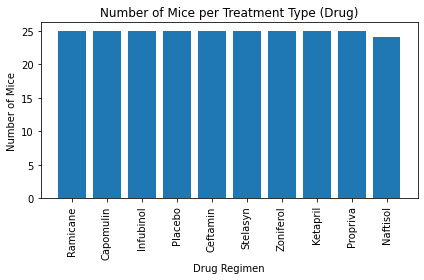

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
y_axis = drug_count
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.title("Number of Mice per Treatment Type (Drug)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.savefig("NumberMice_TreatmentType.png")
plt.show()

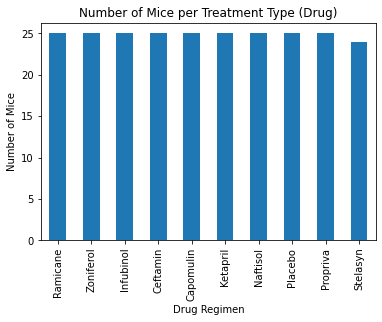

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_plot = drug_count.plot(kind="bar", title="Number of Mice per Treatment Type (Drug)")
drug_plot.set_xlabel("Drug Regimen")
drug_plot.set_ylabel("Number of Mice")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

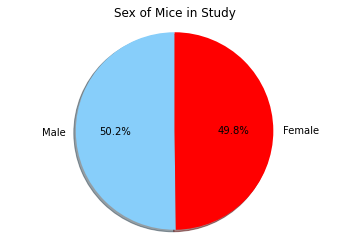

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_mice_df = mouse_metadata["Sex"]
sex_mice_count = sex_mice_df.value_counts()
sex_mice_labels = ["Male", "Female"]
colors=["lightskyblue", "red"]
plt.pie(sex_mice_count, labels=sex_mice_labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Sex of Mice in Study")
plt.axis("equal")
plt.show


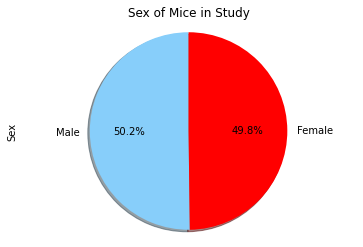

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = mouse_metadata["Sex"]
sex_count = sex_df.value_counts()
sex_plot = sex_count.plot(kind="pie", title="Sex of Mice in Study", autopct="%1.1f%%", 
                          startangle=90, colors=["lightskyblue", "red"], shadow=True)
plt.axis("equal")
plt.savefig("sex_of_mice.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
